#Clean

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/marketing_campaign_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## Drop Unnecessary Columns

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Drop columns
df.drop(columns=(['Unnamed: 0', 'Z_CostContact','Z_Revenue','ID']), inplace=True)

## Extract Columns

In [ ]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,0


In [ ]:
#Extract Columns

df['age'] = 2022 - df['Year_Birth']
df['kids'] = df['Kidhome'] + df['Teenhome']
df['total_transactions'] = df['MntCoke'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['total_purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Campaign_Acc'] = df['AcceptedCmp1'] + df['AcceptedCmp2']+ df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] 

df.drop(['Kidhome', 'Teenhome', 'Year_Birth'],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


## Extract Membership Column

In [ ]:
# Extract Membership Column

df['today'] = pd.to_datetime("today")
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['member_years'] = ((((df['today'] - df['Dt_Customer']).dt.days).astype(int))/365).round(2)
df.drop(columns=(['today', 'Dt_Customer']), inplace=True)

In [ ]:
df.member_years.describe()

count    2240.000000
mean        8.931482
std         0.636203
min         7.530000
25%         8.460000
50%         8.930000
75%         9.410000
max        10.440000
Name: member_years, dtype: float64

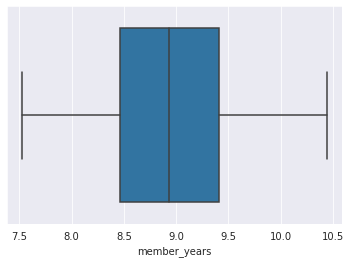

In [ ]:
sns.boxplot(x=df['member_years'])

In [ ]:
#Categorize consumers based on the length of time they have been members
df['member_category'] = np.where(df.member_years > 9.4, 'loyal',
                                       np.where(df.member_years <8.45, 'new','average'))
df.drop('member_years', axis=1,inplace=True)

## Modify Martial Status

In [ ]:
df.Marital_Status.unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace({'Lajang':'Single',
                                                                 'Cerai':'Single',
                                                                 'Janda': 'Single',
                                                                 'Duda': 'Single',
                                                                 'Bertunangan': 'In Relationship',
                                                                 'Menikah': 'In Relationship'})

In [ ]:
df.shape

(2240, 28)

## Handle Outliers

In [ ]:
df.describe()

,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,kids,total_transactions,total_purchases,Campaign_Acc
count,2.216000e+03,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000
mean,5.224725e+07,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,53.194196,0.950446,6.057982e+05,12.537054,0.297768
std,2.517308e+07,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,0.751803,6.022493e+05,7.205741,0.678381
min,1.730000e+06,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,5.000000e+03,0.000000,0.000000
25%,3.530300e+07,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,6.875000e+04,6.000000,0.000000
50%,5.138150e+07,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,1.000000,3.960000e+05,12.000000,0.000000
75%,6.852200e+07,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.000000,1.045500e+06,18.000000,0.000000
max,6.666660e+08,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,3.000000,2.525000e+06,32.000000,4.000000


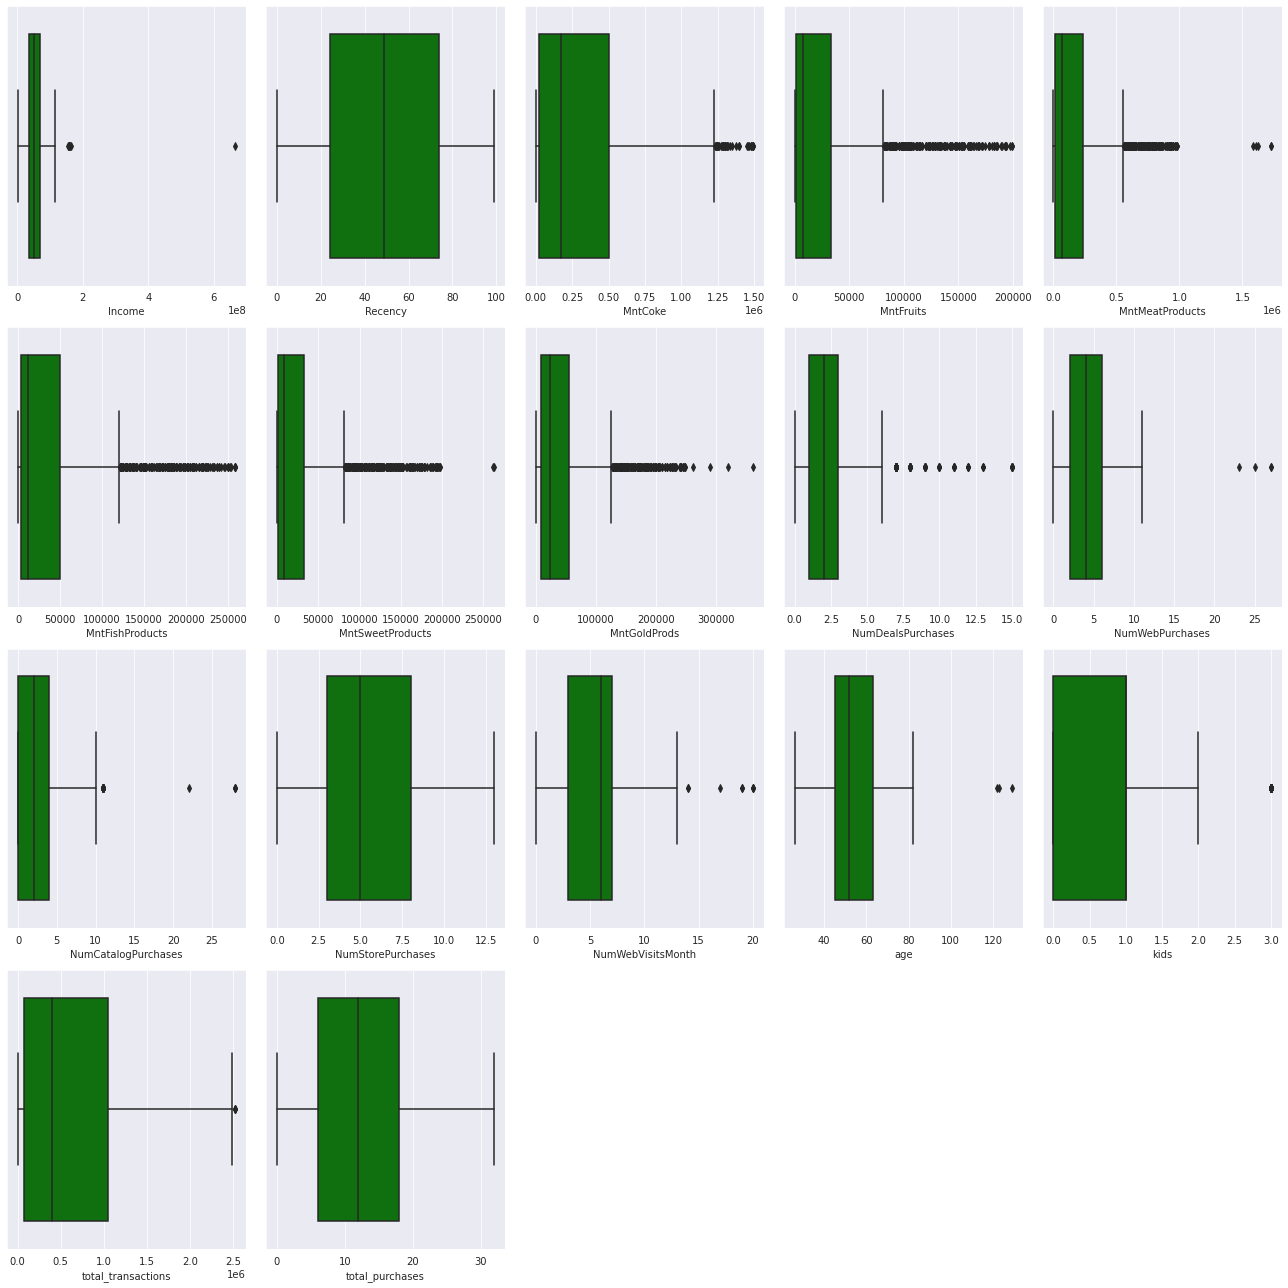

In [ ]:
#Visualize outliers in numeric columns with boxplot
boxplot = ['Income','Recency','MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'age','kids', 'total_transactions','total_purchases']

plt.figure(figsize=(18,18))
for i in range(0, len(boxplot)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x=df[boxplot[i]], color='green')
    plt.tight_layout()


We will handle outliers only in Income and Age columns, because the value seems unusual.

In [ ]:
#Position of the Outlier
print(np.where(df['Income']>150000000))

(array([ 164,  617,  655,  687, 1300, 1653, 2132, 2233]),)


In [ ]:
#Drop row that have outliers
df = df.drop([164,  617,  655,  687, 1300, 1653, 2132, 2233])
df.shape

(2232, 28)

In [ ]:
#Fill null(on Income) and odd value (on Year_Birth)
df['Income'] = df['Income'].fillna(df['Income'].median())
df = df[df['age'] < 120]
df.shape

(2229, 28)

## Feature Encoding

In [ ]:
df_label = df.copy()
df_label.head()

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,kids,total_transactions,total_purchases,Campaign_Acc,member_category
0,S1,Single,58138000.0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1,65,0,1617000,22,0,loyal
1,S1,Single,46344000.0,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0,68,2,27000,4,0,new
2,S1,In Relationship,71613000.0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0,57,0,776000,20,0,average
3,S1,In Relationship,26646000.0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0,38,1,53000,6,0,new
4,S3,In Relationship,58293000.0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0,41,1,422000,14,0,new


In [ ]:
label_encoding = {"Education": {'SMA':0,'D3':1,'S1':2, "S2": 3, "S3": 4},
                  "Marital_Status": {'Single':0, 'In Relationship':1},
                  "member_category": {'new':0, 'average':1, 'loyal':2}}

df_label[['Education', 'Marital_Status', 'member_category']]=df_label[['Education', 'Marital_Status', 'member_category']].replace(label_encoding)

## Selecting Features (RFM Analysis)

In [ ]:
df_select = df_label[['Recency',	'MntCoke',	'MntFruits',	'MntMeatProducts',	'MntFishProducts',	
                'MntSweetProducts',	'MntGoldProds',	'NumDealsPurchases',	'NumWebPurchases',
                'NumCatalogPurchases',	'NumStorePurchases',	'NumWebVisitsMonth',	
                'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',
                'AcceptedCmp2','total_transactions',	'total_purchases',
                'Campaign_Acc',	'member_category']].copy()
df_select.head()

,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,total_transactions,total_purchases,Campaign_Acc,member_category
0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,1617000,22,0,2
1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,27000,4,0,0
2,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,776000,20,0,1
3,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,53000,6,0,0
4,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,422000,14,0,0


In [ ]:
# Dimension reduction 1
# Recency

from sklearn.decomposition import PCA

recency = ['Recency', 'member_category','AcceptedCmp3',	
           'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',
            'AcceptedCmp2','Campaign_Acc']
pca1 = PCA(n_components=1)
pca1.fit(df_select[recency])
df_pca1 = pd.DataFrame(pca1.transform(df_select[recency]))
df_pca1.rename(columns={0:'recency'}, inplace=True)

pca1.explained_variance_ratio_

array([0.99852993])

99% of information is still stored using PCA.

In [ ]:
# Dimension reduction 2
# Frequency

frequency = ['NumDealsPurchases',	'NumWebPurchases',
             'NumCatalogPurchases','NumStorePurchases',
             'NumWebVisitsMonth','total_purchases']
pca2 = PCA(n_components=1)
pca2.fit(df_select[frequency])
df_pca2 = pd.DataFrame(pca2.transform(df_select[frequency]))
df_pca2.rename(columns={0:'frequency'}, inplace=True)

pca2.explained_variance_ratio_

array([0.80718373])

80% of information is still stored using PCA.

In [ ]:
# Dimension reduction 3
# Monetary

monetary = ['MntCoke',	'MntFruits',	
            'MntMeatProducts',	'MntFishProducts',	
            'MntSweetProducts',	'MntGoldProds', 
            'total_transactions']
pca3 = PCA(n_components=1)
pca3.fit(df_select[monetary])
df_pca3 = pd.DataFrame(pca3.transform(df_select[monetary]))
df_pca3.rename(columns={0:'monetary'}, inplace=True)

pca3.explained_variance_ratio_

array([0.9259048])

92% of information is still stored using PCA.

In [ ]:
# Join into new dataframe
df_pca = df_pca1.join(df_pca2)
df_pca = df_pca.join(df_pca3)
df_pca

,recency,frequency,monetary
0,8.894471,10.224120,1.122056e+06
1,-11.106929,-9.782815,-6.708705e+05
2,-23.106221,8.746494,1.931047e+05
3,-23.106925,-7.548171,-6.444721e+05
4,44.893051,1.730282,-2.276807e+05
...,...,...,...
2224,-3.106228,3.702524,8.228772e+05
2225,6.892612,2.504747,-1.338051e+05
2226,41.892936,6.548507,8.221766e+05
2227,-41.106918,10.064480,2.729111e+05


## Standardization

In [ ]:
df_standard = df_pca.copy()
standard = ['recency', 'frequency', 'monetary']

In [ ]:
from sklearn.preprocessing import StandardScaler
df_standard[standard] = StandardScaler().fit_transform(df_standard[standard].values.reshape(len(df_standard),3))

In [ ]:
df_standard

,recency,frequency,monetary
0,0.307342,1.220083,1.599462
1,-0.383792,-1.167420,-0.956309
2,-0.798418,1.043752,0.275266
3,-0.798443,-0.900752,-0.918679
4,1.551246,0.206481,-0.324553
...,...,...,...
2224,-0.107333,0.441836,1.172991
2225,0.238169,0.298901,-0.190736
2226,1.447579,0.781458,1.171992
2227,-1.420419,1.201032,0.389028


# Data Modeling

## Elbow Method

Elbow Method to determine the number of clusters to be formed:


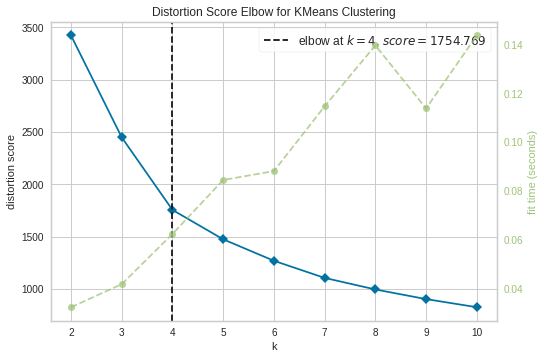

In [31]:
# Using elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_standard)
Elbow_M.show()

The optimal number of clusters using the Elbow Method is 4.

## Clustering

In [32]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=4, random_state=0).fit(df_standard)

In [33]:
df_standard['segment'] = cluster.labels_
df_standard

,recency,frequency,monetary,segment
0,0.307342,1.220083,1.599462,2
1,-0.383792,-1.167420,-0.956309,1
2,-0.798418,1.043752,0.275266,3
3,-0.798443,-0.900752,-0.918679,1
4,1.551246,0.206481,-0.324553,0
...,...,...,...,...
2224,-0.107333,0.441836,1.172991,3
2225,0.238169,0.298901,-0.190736,0
2226,1.447579,0.781458,1.171992,2
2227,-1.420419,1.201032,0.389028,3


## Silhouette Score

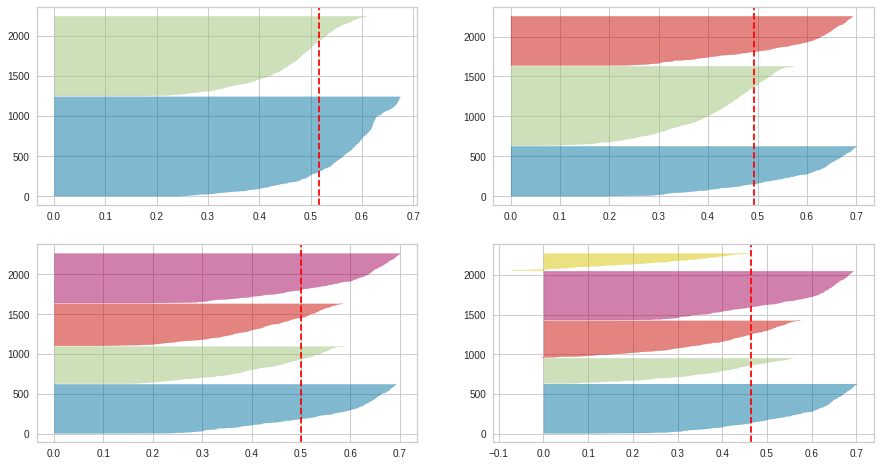

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_standard)

From the silhouette score, the optimum number of clusters is 4. The average coefficient is about 0.5, there is no cluster that has a silhouette score value below the average and the thickness of the four clusters is not too much different. This indicates that the clustering model can distinguish cluster classes from one another.

## Visualize Clusters

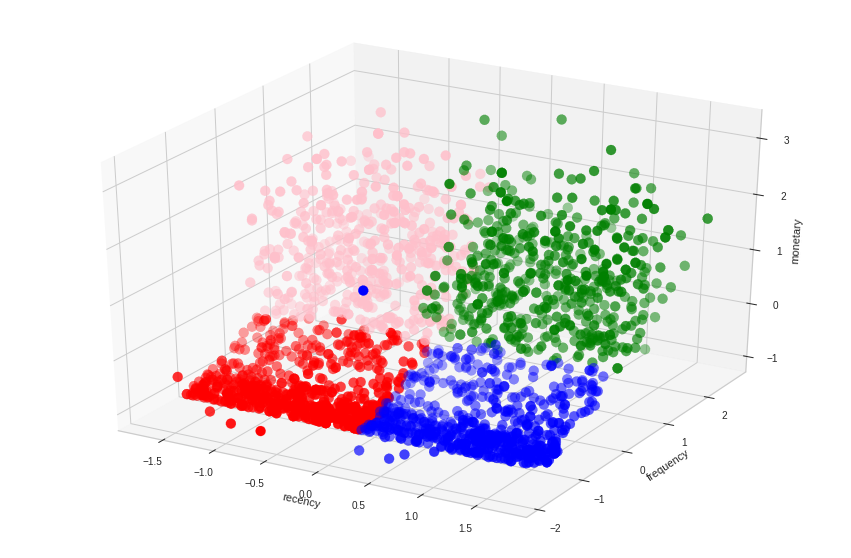

In [36]:
# Static Viz

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_standard['recency'][df_standard.segment == 0], df_standard["frequency"][df_standard.segment == 0], df_standard["monetary"][df_standard.segment == 0], c='blue', s=100, edgecolor='blue',linestyle='--')
ax.scatter(df_standard['recency'][df_standard.segment == 1], df_standard["frequency"][df_standard.segment == 1], df_standard["monetary"][df_standard.segment == 1], c='red', s=100, edgecolor='red',linestyle='--')
ax.scatter(df_standard['recency'][df_standard.segment == 2], df_standard["frequency"][df_standard.segment == 2], df_standard["monetary"][df_standard.segment == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(df_standard['recency'][df_standard.segment == 3], df_standard["frequency"][df_standard.segment == 3], df_standard["monetary"][df_standard.segment == 3], c='pink', s=100, edgecolor='pink',linestyle='--')



plt.xlabel('recency')
plt.ylabel("frequency")
ax.set_zlabel('monetary')
plt.show()

In [37]:
#Simple Interactive Viz

import plotly.express as px
df_3d = df_standard
fig = px.scatter_3d(df_3d, x='recency', y='frequency', z='monetary',
              color='segment')
fig.show()